In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
base_dir = "data/"
dfs = {}

for root, _, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".tsv"):
            file_path = os.path.join(root, file)
            try:
                df = pd.read_csv(file_path, sep="\t")
                dfs[file] = df
                print(f"Loaded: {file_path} with shape {df.shape}")
            except Exception as e:
                print(f"Could not load {file_path}: {e}")

Loaded: data/HGVS_2014_benchmark.tsv with shape (2982, 2)
Loaded: data/vep/HGVS_2014_sift_scores.tsv with shape (400, 2)
Loaded: data/vep/HGVS_2014_polyphen_scores.tsv with shape (400, 2)
Loaded: data/vep/HGVS_2014_VEP_baseline.tsv with shape (400, 3)


In [8]:
dfs["HGVS_2014_benchmark.tsv"]["Label"].value_counts()

Label
Pathogenic    1491
Benign        1491
Name: count, dtype: int64

In [ ]:
import pandas as pd

# Read tab-separated text file
df = pd.read_csv("clinvar_result.txt", sep="\t")
missence_data = df[
    df.apply(
        lambda row: row.astype(str).str.contains("missense", case=False).any(), axis=1
    )
]
print(missence_data.shape, df.shape)

(142, 25) (260, 25)


/tmp/ipykernel_21521/915778170.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("data/BLOSUM62.txt",


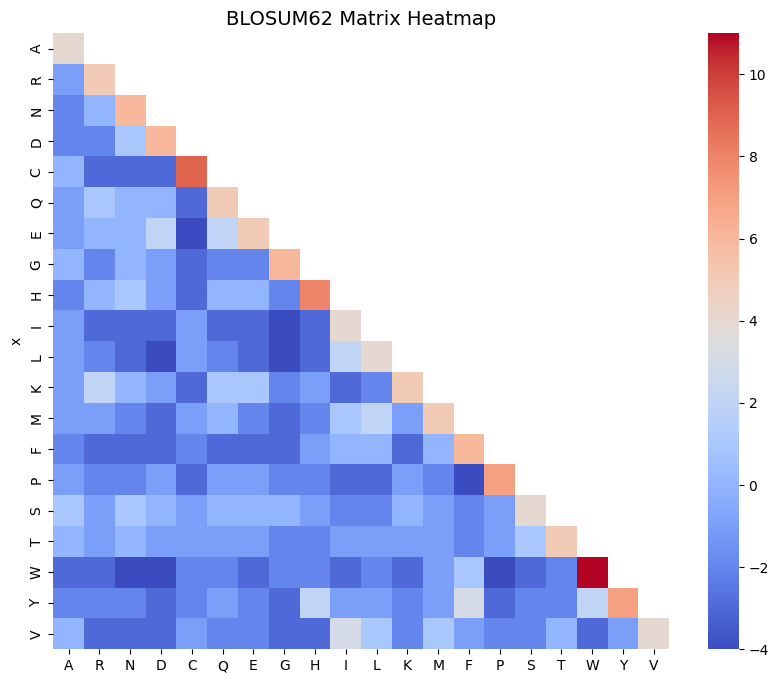

In [ ]:
df = pd.read_csv("data/BLOSUM62.txt", delim_whitespace=True, comment="#", index_col=0)
print(df.shape)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df, dtype=bool), k=1)  # k=1 excludes the diagonal

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, cmap="coolwarm", annot=False, cbar=True, square=True, mask=mask)

plt.title("BLOSUM62 Matrix Heatmap", fontsize=14)
plt.show()
